In [ ]:
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers

from datetime import datetime

import matplotlib.pyplot as plt

import os


# Load data

In [ ]:
df_meta_BDG1 = pd.read_csv('/content/input1/meta_open.csv').set_index('uid')
df_meta_BDG1

dataend    datastart  ...  newweatherfilename annualschedule
uid                                          ...                                   
Office_Abbey    31/12/15 23:00  1/1/15 0:00  ...        weather0.csv  schedule2.csv
Office_Abigail  31/12/15 23:00  1/1/15 0:00  ...        weather0.csv  schedule2.csv
Office_Al       31/12/15 23:00  1/1/15 0:00  ...        weather0.csv  schedule2.csv
Office_Alannah  31/12/15 23:00  1/1/15 0:00  ...        weather0.csv  schedule2.csv
Office_Aliyah   31/12/15 23:00  1/1/15 0:00  ...        weather0.csv  schedule2.csv
...                        ...          ...  ...                 ...            ...
UnivLab_Tami    31/12/13 23:00  1/1/13 0:00  ...        weather8.csv  schedule6.csv
UnivLab_Taylor  31/12/13 23:00  1/1/13 0:00  ...        weather8.csv  schedule6.csv
UnivLab_Terrie  31/12/13 23:00  1/1/13 0:00  ...        weather8.csv  schedule6.csv
UnivLab_Tracie  31/12/13 23:00  1/1/13 0:00  ...        weather8.csv  schedule6.csv
UnivLab_Tracy   31/12/13 23:00  1/1/13 0:00  ...        weather8.csv  schedule6.csv

[507 rows x 19 columns]

## Meta Data Import

In [ ]:
df_meta_BDG1['dataend'] = pd.to_datetime(df_meta_BDG1['dataend'], dayfirst=True)
df_meta_BDG1['datastart'] = pd.to_datetime(df_meta_BDG1['datastart'], dayfirst=True)
df_meta_BDG1

dataend  datastart  ...  newweatherfilename annualschedule
uid                                            ...                                   
Office_Abbey   2015-12-31 23:00:00 2015-01-01  ...        weather0.csv  schedule2.csv
Office_Abigail 2015-12-31 23:00:00 2015-01-01  ...        weather0.csv  schedule2.csv
Office_Al      2015-12-31 23:00:00 2015-01-01  ...        weather0.csv  schedule2.csv
Office_Alannah 2015-12-31 23:00:00 2015-01-01  ...        weather0.csv  schedule2.csv
Office_Aliyah  2015-12-31 23:00:00 2015-01-01  ...        weather0.csv  schedule2.csv
...                            ...        ...  ...                 ...            ...
UnivLab_Tami   2013-12-31 23:00:00 2013-01-01  ...        weather8.csv  schedule6.csv
UnivLab_Taylor 2013-12-31 23:00:00 2013-01-01  ...        weather8.csv  schedule6.csv
UnivLab_Terrie 2013-12-31 23:00:00 2013-01-01  ...        weather8.csv  schedule6.csv
UnivLab_Tracie 2013-12-31 23:00:00 2013-01-01  ...        weather8.csv  schedule6.csv
UnivLab_Tracy  2013-12-31 23:00:00 2013-01-01  ...        weather8.csv  schedule6.csv

[507 rows x 19 columns]

- Dayfirst를 True로 하면 해당 Data는 Day로 시작한다는 의미이다.

## Power Meter Data Import


In [ ]:
df_powerMeter_BDG1 = pd.read_csv('/content/input1/temp_open_utc_complete.csv', index_col = 'timestamp',parse_dates=True)
df_powerMeter_BDG1

Office_Cristina  ...  PrimClass_Jenna
timestamp                                   ...                 
2010-01-01 08:00:00+00:00              NaN  ...              NaN
2010-01-01 09:00:00+00:00              NaN  ...              NaN
2010-01-01 10:00:00+00:00              NaN  ...              NaN
2010-01-01 11:00:00+00:00              NaN  ...              NaN
2010-01-01 12:00:00+00:00              NaN  ...              NaN
...                                    ...  ...              ...
2015-06-26 16:00:00+00:00            4.475  ...              4.7
2015-06-26 17:00:00+00:00            4.700  ...              3.3
2015-06-26 18:00:00+00:00            4.425  ...              2.9
2015-06-26 19:00:00+00:00            4.100  ...              3.0
2015-06-26 20:00:00+00:00            3.925  ...              NaN

[36418 rows x 507 columns]

In [ ]:
df_powerMeter_BDG1.index = df_powerMeter_BDG1.index.tz_localize(None)
df_powerMeter_BDG1

Office_Cristina  ...  PrimClass_Jenna
timestamp                             ...                 
2010-01-01 08:00:00              NaN  ...              NaN
2010-01-01 09:00:00              NaN  ...              NaN
2010-01-01 10:00:00              NaN  ...              NaN
2010-01-01 11:00:00              NaN  ...              NaN
2010-01-01 12:00:00              NaN  ...              NaN
...                              ...  ...              ...
2015-06-26 16:00:00            4.475  ...              4.7
2015-06-26 17:00:00            4.700  ...              3.3
2015-06-26 18:00:00            4.425  ...              2.9
2015-06-26 19:00:00            4.100  ...              3.0
2015-06-26 20:00:00            3.925  ...              NaN

[36418 rows x 507 columns]

In [ ]:
df_powerMeter_BDG1_align = pd.DataFrame()

for col in df_powerMeter_BDG1.columns:
  datastart = df_meta_BDG1.loc[col,'datastart']
  dataend = df_meta_BDG1.loc[col, 'dataend']
  df_temp = df_powerMeter_BDG1[col].loc[datastart:dataend].reset_index(drop=True)
  df_powerMeter_BDG1_align = pd.concat([df_powerMeter_BDG1_align, df_temp], axis=1)

df_powerMeter_BDG1_align


Office_Cristina  PrimClass_Jolie  ...  PrimClass_Jazmin  PrimClass_Jenna
0                 NaN              0.7  ...         31.470000              2.5
1                 NaN              0.6  ...         38.750001              1.7
2                 NaN              0.8  ...         29.640000              1.6
3                 NaN              0.7  ...         21.370000              1.6
4                 NaN              0.8  ...         19.300000              1.8
...               ...              ...  ...               ...              ...
8774              NaN              NaN  ...               NaN              NaN
8775              NaN              NaN  ...               NaN              NaN
8776              NaN              NaN  ...               NaN              NaN
8777              NaN              NaN  ...               NaN              NaN
8778              NaN              NaN  ...               NaN              NaN

[8779 rows x 507 columns]

- 메타데이터와 실제 Power Meter 테이블 사이에서 Start 지점과 End 지점을 통해 전기사용량 데이터를 추출함

In [ ]:
df_powerMeter_BDG2 = pd.read_csv('/content/input2/electricity_cleaned.csv')
df_powerMeter_BDG2

timestamp  ...  Mouse_science_Micheal
0      2016-01-01 00:00:00  ...               168.2243
1      2016-01-01 01:00:00  ...               336.4486
2      2016-01-01 02:00:00  ...               336.4486
3      2016-01-01 03:00:00  ...               336.4486
4      2016-01-01 04:00:00  ...               336.4486
...                    ...  ...                    ...
15296  2017-09-29 08:00:00  ...                    NaN
15297  2017-09-29 09:00:00  ...                    NaN
15298  2017-09-29 10:00:00  ...                    NaN
15299  2017-09-29 11:00:00  ...                    NaN
15300  2017-09-29 12:00:00  ...                    NaN

[15301 rows x 1579 columns]

In [ ]:
df_powerMeter_BDG2['timestamp'] = pd.to_datetime(df_powerMeter_BDG2['timestamp'])
df_powerMeter_BDG2 = df_powerMeter_BDG2.set_index('timestamp')
df_powerMeter_BDG2

Panther_parking_Lorriane  ...  Mouse_science_Micheal
timestamp                                      ...                       
2016-01-01 00:00:00                       NaN  ...               168.2243
2016-01-01 01:00:00                       NaN  ...               336.4486
2016-01-01 02:00:00                       NaN  ...               336.4486
2016-01-01 03:00:00                       NaN  ...               336.4486
2016-01-01 04:00:00                       NaN  ...               336.4486
...                                       ...  ...                    ...
2017-09-29 08:00:00                   10.2620  ...                    NaN
2017-09-29 09:00:00                   10.9821  ...                    NaN
2017-09-29 10:00:00                   11.2822  ...                    NaN
2017-09-29 11:00:00                   11.5822  ...                    NaN
2017-09-29 12:00:00                   11.4622  ...                    NaN

[15301 rows x 1578 columns]

In [ ]:
df_power_meter = pd.concat([df_powerMeter_BDG2.loc[:'2016-12'].reset_index(drop=True), df_powerMeter_BDG1_align.reset_index(drop=True)], axis=1)
df_power_meter.index = df_powerMeter_BDG2.loc[:'2016-12'].index
df_power_meter

Panther_parking_Lorriane  ...  PrimClass_Jenna
timestamp                                      ...                 
2016-01-01 00:00:00                       NaN  ...              2.5
2016-01-01 01:00:00                       NaN  ...              1.7
2016-01-01 02:00:00                       NaN  ...              1.6
2016-01-01 03:00:00                       NaN  ...              1.6
2016-01-01 04:00:00                       NaN  ...              1.8
...                                       ...  ...              ...
2016-12-31 19:00:00                   13.5026  ...              NaN
2016-12-31 20:00:00                   12.7825  ...              NaN
2016-12-31 21:00:00                   13.0825  ...              NaN
2016-12-31 22:00:00                   13.2625  ...              NaN
2016-12-31 23:00:00                   12.7224  ...              NaN

[8784 rows x 2085 columns]

In [ ]:
from matplotlib import dates as md
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
cf.set_config_file(offline=True)

In [ ]:
df_small_noise = df_power_meter.loc[:'2016-12'].copy()
df_small_noise = df_small_noise.fillna(method='ffill').fillna(method='bfill')
df_small_noise.iloc[:,:5].iplot()

<AxesSubplot:xlabel='timestamp'>

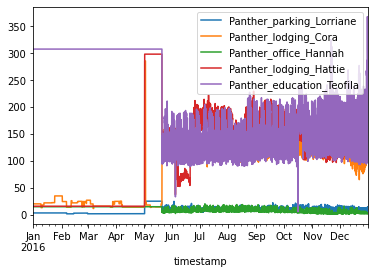

In [ ]:
df_small_noise.iloc[:,:5].plot()

In [ ]:
df_daily_jumpsup = df_powerMeter_BDG2.loc['2016-12':'2017-12'].copy()
df_daily_jumpsup = df_daily_jumpsup.fillna(method='ffill').fillna(method='bfill')
df_daily_jumpsup.iloc[:,:5].iplot()

<AxesSubplot:xlabel='timestamp'>

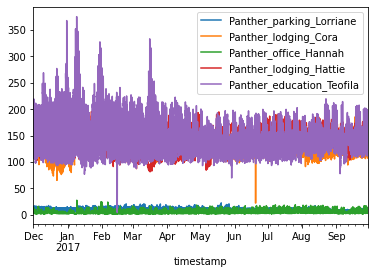

In [ ]:
df_daily_jumpsup.iloc[:,:5].plot()

# Prepare training data

In [ ]:
def normalize(df):
  mean = df.mean()
  df -=mean
  std = df.std()
  df /= std
  return df, mean, std

train_value, train_mean, train_std = normalize(df_small_noise)
len(df_small_noise)

8784

In [ ]:
df_small_noise.shape

(8784, 2085)

In [ ]:
X_train = np.reshape(train_value.dropna(axis=1).T.values, train_value.dropna(axis=1).T.values.shape+(1,))
X_train.shape

(2038, 8784, 1)

In [ ]:
train_value

Panther_parking_Lorriane  ...  PrimClass_Jenna
timestamp                                      ...                 
2016-01-01 00:00:00                 -0.942637  ...        -0.619727
2016-01-01 01:00:00                 -0.942637  ...        -0.976045
2016-01-01 02:00:00                 -0.942637  ...        -1.020585
2016-01-01 03:00:00                 -0.942637  ...        -1.020585
2016-01-01 04:00:00                 -0.942637  ...        -0.931505
...                                       ...  ...              ...
2016-12-31 19:00:00                  0.690899  ...        -0.397028
2016-12-31 20:00:00                  0.570645  ...        -0.397028
2016-12-31 21:00:00                  0.620744  ...        -0.397028
2016-12-31 22:00:00                  0.650803  ...        -0.397028
2016-12-31 23:00:00                  0.560609  ...        -0.397028

[8784 rows x 2085 columns]

In [ ]:
X_train

array([[[-0.94263732],
        [-0.94263732],
        [-0.94263732],
        ...,
        [ 0.62074407],
        [ 0.65080332],
        [ 0.56060888]],

       [[-1.19871284],
        [-1.19871284],
        [-1.19871284],
        ...,
        [ 0.56760611],
        [ 0.76161973],
        [ 0.60447749]],

       [[ 1.00196156],
        [ 1.00196156],
        [ 1.00196156],
        ...,
        [-1.44175767],
        [-1.43430857],
        [-1.45227404]],

       ...,

       [[ 0.69758983],
        [ 1.1061918 ],
        [ 0.71891747],
        ...,
        [-0.43024786],
        [-0.43024786],
        [-0.43024786]],

       [[ 2.36578435],
        [ 3.1196084 ],
        [ 2.17629289],
        ...,
        [-0.68575303],
        [-0.68575303],
        [-0.68575303]],

       [[-0.61972658],
        [-0.97604489],
        [-1.02058466],
        ...,
        [-0.39702764],
        [-0.39702764],
        [-0.39702764]]])

In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
        layers.BatchNormalization(),
        layers.Conv1D(
            filters=32, kernel_size=24, padding="same", strides=3, activation="relu"
        ),
        layers.Dropout(rate=0.05),
        layers.Conv1D(
            filters=16, kernel_size=24, padding="same", strides=3, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=24, padding="same", strides=3, activation="relu"
        ),
        layers.Dropout(rate=0.05),
        layers.Conv1DTranspose(
            filters=32, kernel_size=24, padding="same", strides=3, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=24, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 8784, 1)          4         
 ormalization)                                                   
                                                                 
 conv1d (Conv1D)             (None, 2928, 32)          800       
                                                                 
 dropout (Dropout)           (None, 2928, 32)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 976, 16)           12304     
                                                                 
 conv1d_transpose (Conv1DTra  (None, 2928, 16)         6160      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 2928, 16)          0

In [ ]:
history= model.fit(X_train,X_train, epochs=50, batch_size=128, validation_split=0.5, callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")])

Epoch 1/50
8/8 [==============================] - 45s 5s/step - loss: 0.8731 - val_loss: 0.5735
Epoch 2/50
8/8 [==============================] - 49s 6s/step - loss: 0.3716 - val_loss: 0.2003
Epoch 3/50
8/8 [==============================] - 41s 5s/step - loss: 0.2179 - val_loss: 0.1670
Epoch 4/50
8/8 [==============================] - 44s 5s/step - loss: 0.1708 - val_loss: 0.1527
Epoch 5/50
8/8 [==============================] - 39s 5s/step - loss: 0.1466 - val_loss: 0.1324
Epoch 6/50
8/8 [==============================] - 39s 5s/step - loss: 0.1328 - val_loss: 0.1207
Epoch 7/50
8/8 [==============================] - 39s 5s/step - loss: 0.1213 - val_loss: 0.1089
Epoch 8/50
8/8 [==============================] - 40s 5s/step - loss: 0.1109 - val_loss: 0.0979
Epoch 9/50
8/8 [==============================] - 39s 5s/step - loss: 0.1002 - val_loss: 0.0866
Epoch 10/50
8/8 [==============================] - 39s 5s/step - loss: 0.0893 - val_loss: 0.0787
Epoch 11/50
8/8 [======================

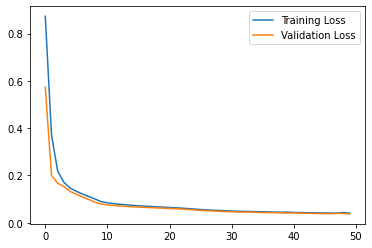

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

64/64 [==============================] - 17s 262ms/step


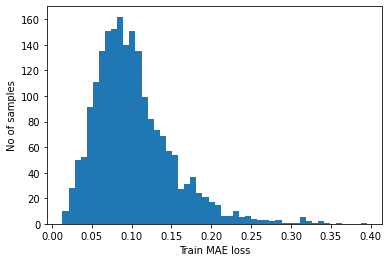

Reconstruction error threshold:  0.39519404440451894


In [ ]:
# Get train MAE loss.
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

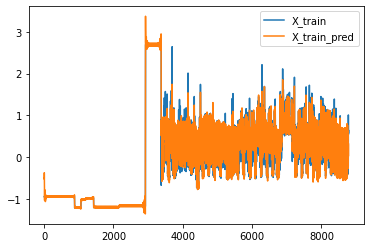

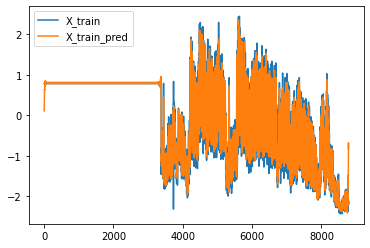

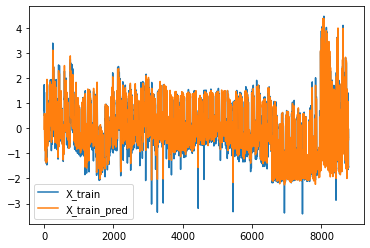

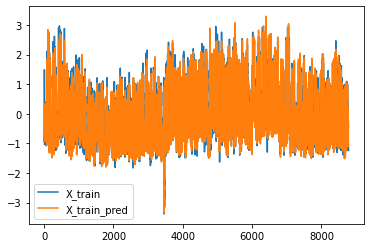

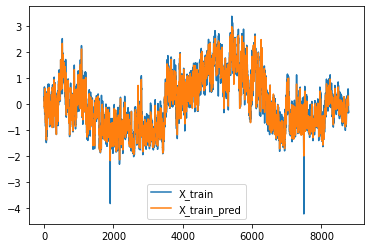

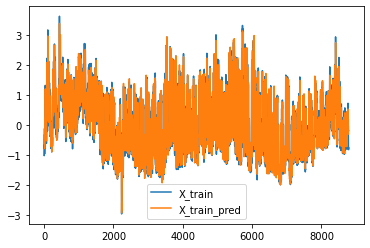

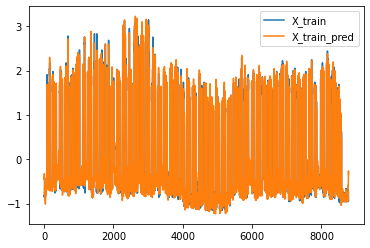

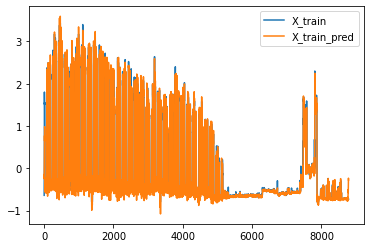

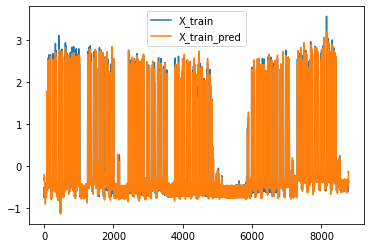

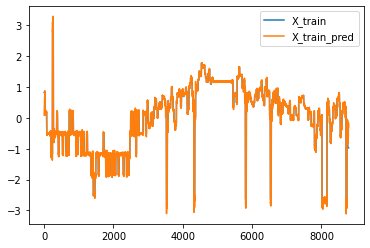

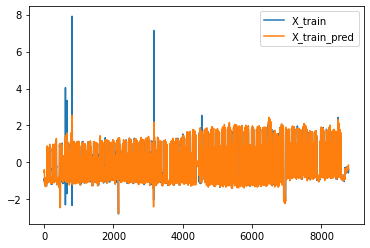

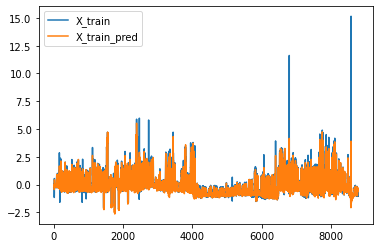

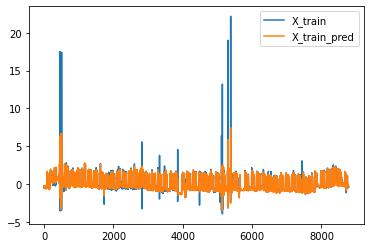

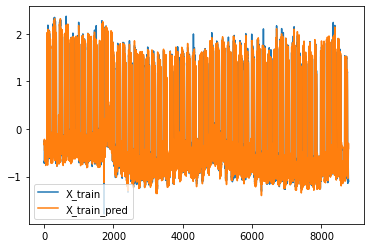

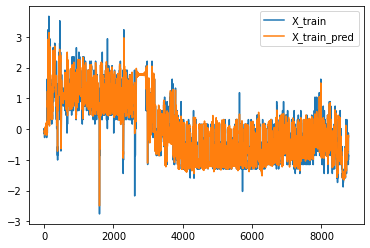

In [ ]:
for idx in np.arange(0,1500,100):
    pd.concat([pd.Series(X_train[idx].flatten()).rename('X_train'), pd.Series(X_train_pred[idx].flatten()).rename('X_train_pred')], axis=1).plot()